<a href="https://colab.research.google.com/github/shivansh2310/Finance-Stuff/blob/main/Huster_Exponent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install hurst

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import yfinance as yf
import pandas as pd
from pandas_datareader import data
from hurst import compute_Hc
import numpy as np
import matplotlib.pyplot as plt

In [19]:
start_date = '2010-01-01'
end_date = '2023-04-28'
Nifty_data = yf.download('^NSEI', start_date, end_date)
prices = Nifty_data['Adj Close']

H = compute_Hc(prices, kind='price')[0]
print("H={:.4f}".format(H))

if H > 0.5:
  print("Trending behviour")

elif H < 0.5:
  print("Mean reverting Behvaiour")


[*********************100%***********************]  1 of 1 completed
H=0.6974
Trending behviour


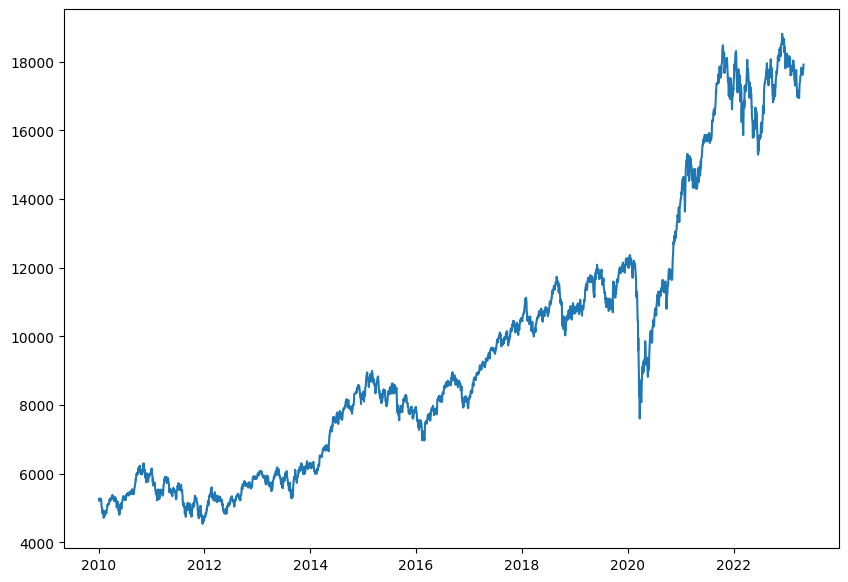

In [30]:
plt.figure(figsize=(10,7))
plt.plot(prices)

In [31]:
log_returns = np.log(Nifty_data['Adj Close']).diff().dropna()
log_returns

Date
2010-01-05    0.008696
2010-01-06    0.000739
2010-01-07   -0.003547
2010-01-08   -0.003493
2010-01-11    0.000886
                ...   
2023-04-21   -0.000023
2023-04-24    0.006749
2023-04-25    0.001456
2023-04-26    0.002493
2023-04-27    0.005679
Name: Adj Close, Length: 3266, dtype: float64

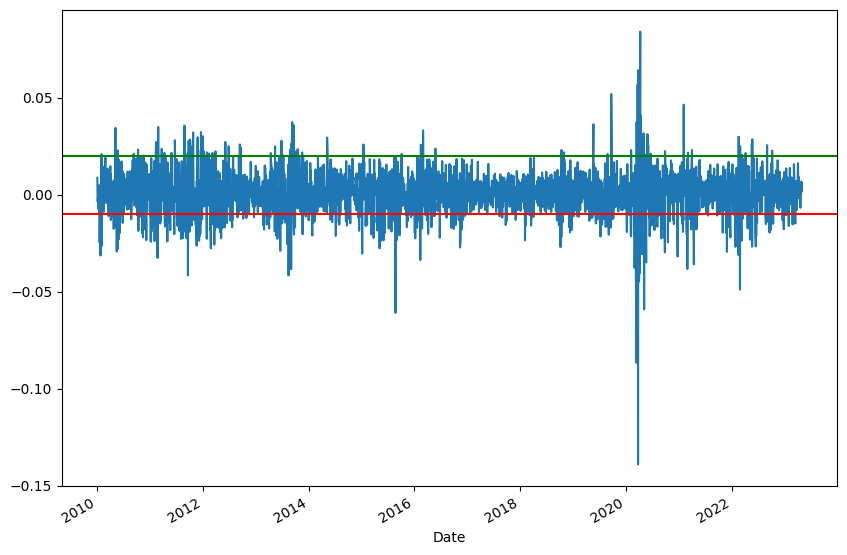

In [37]:
plt.figure(figsize=(10,7))
log_returns.plot()
plt.axhline(0.02,color='g')
plt.axhline(-0.01,color='r')